# Preprocessing ``train.csv`` 

In [215]:
import pandas as pd
import numpy as np

In [216]:
train = pd.read_csv("train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        774 non-null    float64
 1   tenure        800 non-null    int64  
 2   age           800 non-null    int64  
 3   income        784 non-null    float64
 4   marital       788 non-null    object 
 5   address zone  800 non-null    object 
 6   ed            781 non-null    float64
 7   employ        800 non-null    int64  
 8   retire        800 non-null    object 
 9   gender        800 non-null    object 
 10  reside        774 non-null    float64
 11  custcat       800 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 75.1+ KB


### handling missing values
 replaced all NA values with mode of their column.
 for marital column replaced NA value to UNknown nad will treat as 3rd factor apart from single or married.
 and filled income collumn with mean values

In [217]:
train.marital.value_counts()

Married    368
Single     367
Unknown     53
Name: marital, dtype: int64

In [218]:
train['marital'].replace({'Unknown': None},inplace =True)

In [219]:
train['marital'].fillna('Unknown', inplace=True)

In [220]:
train.marital.value_counts()

Married    368
Single     367
Unknown     65
Name: marital, dtype: int64

In [221]:
train.income.describe()

count     784.000000
mean       76.922194
std       108.286705
min         9.000000
25%        29.000000
50%        48.000000
75%        83.000000
max      1668.000000
Name: income, dtype: float64

In [222]:
train['income'].fillna((train['income'].mean()), inplace=True)

In [223]:
train.reside.value_counts()

1.0    282
2.0    228
3.0     97
4.0     94
5.0     48
6.0     21
8.0      2
7.0      2
Name: reside, dtype: int64

In [224]:
train['reside'].fillna(1.0, inplace=True)

In [225]:
train.ed.value_counts()

2.0    222
4.0    186
3.0    162
1.0    161
5.0     50
Name: ed, dtype: int64

In [226]:
train['ed'].fillna(2.0, inplace=True)

In [227]:
train.region.value_counts()

3.0    273
2.0    262
1.0    239
Name: region, dtype: int64

In [228]:
train['region'].fillna(3.0, inplace=True)

### dealing with outliers

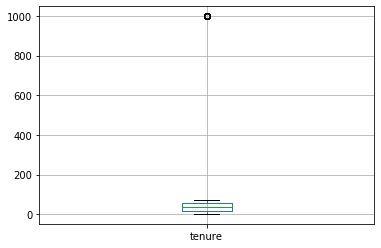

In [229]:
train.boxplot(column='tenure', grid=True)

In [230]:
Q1 = train['tenure'].quantile(0.25)
Q3 = train['tenure'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (train['tenure'] >= Q1 - 1.5 * IQR) & (train['tenure'] <= Q3 + 1.5 *IQR)
train_filtered = train.loc[filter] 

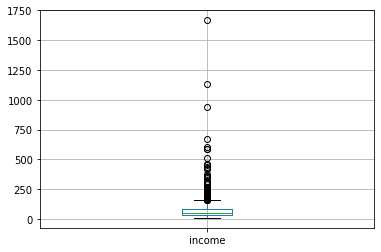

In [231]:
train_filtered.boxplot(column='income', grid=True)

In [232]:
Q1 = train_filtered['income'].quantile(0.25)
Q3 = train_filtered['income'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (train_filtered['income'] >= Q1 - 1.5 * IQR) & (train_filtered['income'] <= Q3 + 1.5 *IQR)
train_filtered = train_filtered.loc[filter] 

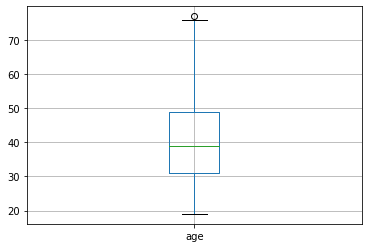

In [233]:
train_filtered.boxplot(column='age', grid=True)

In [234]:
Q1 = train_filtered['age'].quantile(0.25)
Q3 = train_filtered['age'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (train_filtered['age'] >= Q1 - 1.5 * IQR) & (train_filtered['age'] <= Q3 + 1.5 *IQR)
train_f = train_filtered.loc[filter] 

In [235]:
train_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 1 to 798
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        685 non-null    float64
 1   tenure        685 non-null    int64  
 2   age           685 non-null    int64  
 3   income        685 non-null    float64
 4   marital       685 non-null    object 
 5   address zone  685 non-null    object 
 6   ed            685 non-null    float64
 7   employ        685 non-null    int64  
 8   retire        685 non-null    object 
 9   gender        685 non-null    object 
 10  reside        685 non-null    float64
 11  custcat       685 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 69.6+ KB


### mapping and converting in one hot vector

In [236]:
dummies1 = pd.get_dummies(train_f['region'], prefix='Region', prefix_sep='_')
dummies = dummies1

In [237]:
dummies1 = pd.get_dummies(train_f['ed'], prefix='ed', prefix_sep='_')
dummies = dummies.join(dummies1)

In [238]:
dummies1 = pd.get_dummies(train_f['reside'], prefix='reside', prefix_sep='_')
dummies = dummies.join(dummies1)

In [239]:
dummies1 = pd.get_dummies(train_f['marital'], prefix='marital', prefix_sep='_')
dummies = dummies.join(dummies1)

In [240]:
train_f = train_f.drop(['region', 'address zone','ed','reside','marital'], axis = 1) 

In [241]:
train_f['retire']= train_f['retire'].map({'No':0, 'Yes':1})
train_f['gender']= train_f['gender'].map({'Female':0, 'Male':1})

In [242]:
train_final = train_f.join(dummies)

In [243]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 1 to 798
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           685 non-null    int64  
 1   age              685 non-null    int64  
 2   income           685 non-null    float64
 3   employ           685 non-null    int64  
 4   retire           685 non-null    int64  
 5   gender           685 non-null    int64  
 6   custcat          685 non-null    object 
 7   Region_1.0       685 non-null    uint8  
 8   Region_2.0       685 non-null    uint8  
 9   Region_3.0       685 non-null    uint8  
 10  ed_1.0           685 non-null    uint8  
 11  ed_2.0           685 non-null    uint8  
 12  ed_3.0           685 non-null    uint8  
 13  ed_4.0           685 non-null    uint8  
 14  ed_5.0           685 non-null    uint8  
 15  reside_1.0       685 non-null    uint8  
 16  reside_2.0       685 non-null    uint8  
 17  reside_3.0      

In [244]:
x = train_final.drop(train_final.columns[6],axis=1)
y = train_final['custcat']

In [245]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()
x_s= scaler.fit_transform(x)

# Preprocessing ``test.csv`` 

In [246]:
test = pd.read_csv("test.csv")

### removing null values

In [247]:
test['marital'].fillna('Unknown', inplace=True)
test['income'].fillna((train['income'].mean()), inplace=True)
test['reside'].fillna(1.0, inplace=True)
test['ed'].fillna(2.0, inplace=True)
test['region'].fillna(3.0, inplace=True)

#### adding dummy variables and mapping

In [248]:
dummies2 = pd.get_dummies(test['region'], prefix='Region', prefix_sep='_')
dummies_test = dummies2
dummies2 = pd.get_dummies(test['ed'], prefix='ed', prefix_sep='_')
dummies_test = dummies_test.join(dummies2)
dummies2 = pd.get_dummies(test['reside'], prefix='reside', prefix_sep='_')
dummies_test = dummies_test.join(dummies2)
dummies2 = pd.get_dummies(test['marital'], prefix='marital', prefix_sep='_')
dummies_test = dummies_test.join(dummies2)

In [249]:
test = test.drop(['region', 'address zone','ed','reside','marital'], axis = 1) 

In [250]:
test['gender']= test['gender'].map({'Female':0, 'Male':1})

In [251]:
test_final = test.join(dummies_test)

In [252]:
test_final = test_final.drop(test_final.columns[0],axis=1)

In [253]:
test_final['reside_8.0'] = 0

In [254]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [255]:
test_final['employ'][test_final['employ'].apply(lambda i: True if re.search('^\s*$', str(i)) else False)]=np.nan

C:\Users\ray19\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [256]:
test_final['employ'].fillna((train['employ'].mean()), inplace=True)


In [257]:
test_final['employ'] = test_final['employ'].astype(str).astype(float)

In [258]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           200 non-null    int64  
 1   age              200 non-null    int64  
 2   income           200 non-null    float64
 3   employ           200 non-null    float64
 4   retire           200 non-null    int64  
 5   gender           200 non-null    int64  
 6   Region_1.0       200 non-null    uint8  
 7   Region_2.0       200 non-null    uint8  
 8   Region_3.0       200 non-null    uint8  
 9   ed_1.0           200 non-null    uint8  
 10  ed_2.0           200 non-null    uint8  
 11  ed_3.0           200 non-null    uint8  
 12  ed_4.0           200 non-null    uint8  
 13  ed_5.0           200 non-null    uint8  
 14  reside_1.0       200 non-null    uint8  
 15  reside_2.0       200 non-null    uint8  
 16  reside_3.0       200 non-null    uint8  
 17  reside_4.0      

In [259]:
xt = test_final
xts = scaler.transform(xt)

# Machine learning models 

In [260]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
xs_train, xs_test, y_train, y_test = train_test_split(x_s, y, test_size=0.33, random_state=1)


### knn

In [314]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[2, 5, 10]}
grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='precision_macro')
grid_knn.fit(xs_train, y_train)
grid_knn.score(xs_train, y_train)

0.5570451203503125

In [315]:
grid_knn.score(xs_test, y_test)

0.36338639147515595

In [316]:
grid_knn.best_params_

{'n_neighbors': 5}

### Dtree

In [265]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth':[1, 2, 3, 4, 5, 6,10,15]}
dtree = DecisionTreeClassifier()

grid_tree = GridSearchCV(dtree, param_grid, cv = 5, scoring='precision_macro', return_train_score = True)
grid_tree.fit(x_train, y_train)

C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 10, 15]},
           

In [267]:
grid_tree.score(x_train, y_train)

0.6048503810660312

In [269]:
grid_tree.score(x_test, y_test)

0.30886068872987477

In [47]:
grid_tree.best_params_

{'max_depth': 5}

### linear svm

In [272]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_svclin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='precision_macro')
grid_svclin.fit(x_train, y_train)

C:\Users\ray19\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision_macro', verbose=0)

In [273]:
grid_svclin.score(x_train, y_train)

0.47406794425087107

In [274]:
grid_svclin.score(x_test, y_test)

0.39721950424005215

In [275]:
grid_svclin.best_params_

{'C': 0.01}

### svc rbf

In [276]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
grid_svc = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [0.1,1,10],
    'kernel': ['linear','rbf']
}, cv=5, return_train_score=True)
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [277]:
y_pred = grid_svc.predict(x_test)
precision_score(y_test, y_pred, average ='macro')

0.3520519785054669

In [278]:
grid_svc.best_params_

{'C': 0.1, 'kernel': 'linear'}

### svcpoly

In [280]:
from sklearn.svm import SVC

param_grid = {'C':[0.01, 0.1, 1, 10,100,1000], 'degree':[1,2,3,4]}
grid_svcpoly = GridSearchCV(SVC(gamma = 'auto'), 
                                  param_grid = param_grid
                                  , cv=5, return_train_score=True,
                                  scoring='precision_macro')
grid_svcpoly.fit(x_train, y_train)

C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_macro', verbose=0)

In [281]:
grid_svcpoly.score(x_train, y_train)

1.0

In [282]:
y_pred = grid_svcpoly.predict(x_test)
precision_score(y_test, y_pred, average ='macro')

0.26191760644834816

### RandomForest

In [283]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth':[1, 2, 3, 4, 5, 6],'n_estimators':[10,50,100,]}
rf = RandomForestClassifier(random_state=1)

grid_rf = GridSearchCV(rf, param_grid, cv = 5, scoring='precision_macro')
grid_rf.fit(x_train, y_train)

C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [284]:
grid_rf.score(x_train, y_train)

0.5887282946283489

In [285]:
grid_rf.score(x_test, y_test)

0.3865176151761518

In [286]:
grid_rf.best_params_

{'max_depth': 3, 'n_estimators': 100}

### Hard Voting

In [289]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [290]:
voting_clf_hard = VotingClassifier(estimators = [('tree',grid_tree),('knn',grid_knn),('svc',grid_svc)],voting = 'hard')

In [291]:
voting_clf_hard.fit(x_train,y_train)

C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

VotingClassifier(estimators=[('tree',
                              GridSearchCV(cv=5, error_score=nan,
                                           estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                            class_weight=None,
                                                                            criterion='gini',
                                                                            max_depth=None,
                                                                            max_features=None,
                                                                            max_leaf_nodes=None,
                                                                            min_impurity_decrease=0.0,
                                                                            min_impurity_split=None,
                                                                            min_samples_leaf=1,
                                

In [287]:
y_pred = voting_clf_hard.predict(x_train)
precision_score(y_train, y_pred, average ='macro')

0.5386151975776854

In [288]:
y_pred = voting_clf_hard.predict(x_test)
precision_score(y_test, y_pred, average ='macro')

0.30108205295848317

### Soft Voting

In [292]:
voting_clf_soft = VotingClassifier(estimators = [('tree',grid_tree),('knn',grid_knn)],voting = 'soft')

In [293]:
voting_clf_soft.fit(x_train,y_train)

C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ray19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

VotingClassifier(estimators=[('tree',
                              GridSearchCV(cv=5, error_score=nan,
                                           estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                            class_weight=None,
                                                                            criterion='gini',
                                                                            max_depth=None,
                                                                            max_features=None,
                                                                            max_leaf_nodes=None,
                                                                            min_impurity_decrease=0.0,
                                                                            min_impurity_split=None,
                                                                            min_samples_leaf=1,
                                

In [294]:
y_pred = voting_clf_soft.predict(x_train)
precision_score(y_train, y_pred, average ='macro')

0.5755634784830943

In [295]:
y_pred = voting_clf_soft.predict(x_test)
precision_score(y_test, y_pred, average ='macro')

0.30807985802045224

### bagging classifier

##### svclin

In [296]:
from sklearn.ensemble import BaggingClassifier
bag_clf1 = BaggingClassifier(grid_svclin, n_estimators=500, max_samples=0.3, bootstrap=False, n_jobs=-1, random_state=0)
bag_clf1.fit(x_train, y_train)
y_pred = bag_clf1.predict(x_train)
precision_score(y_train, y_pred, average ='macro')

0.4445155993431855

In [299]:
y_pred = bag_clf1.predict(x_test)
precision_score(y_test, y_pred, average ='macro')

0.3590792668378875

#### Knn

In [298]:
bag_clf2 = BaggingClassifier(grid_knn, n_estimators=500, max_samples=0.3, bootstrap=False, n_jobs=-1, random_state=0)
bag_clf2.fit(x_train, y_train)
y_pred = bag_clf2.predict(x_train)
precision_score(y_train, y_pred, average ='macro')

0.5583897920098309

In [301]:
y_pred = bag_clf2.predict(x_test)
precision_score(y_test, y_pred, average ='macro')

0.32039259616659

#### RandomForest

In [302]:
bag_clf3 = BaggingClassifier(grid_rf, n_estimators=500, max_samples=0.3, bootstrap=False, n_jobs=-1, random_state=0)
bag_clf3.fit(x_train, y_train)
y_pred = bag_clf3.predict(x_train)
precision_score(y_train, y_pred, average ='macro')

0.6327443551852493

In [303]:
y_pred = bag_clf3.predict(x_test)
precision_score(y_test, y_pred, average ='macro')

0.36243872549019607

### Adaboost

In [304]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf1 = AdaBoostClassifier(rf, n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf1.fit(x_train, y_train)
y_pred = ada_clf1.predict(x_train)
precision_score(y_train, y_pred, average ='macro')

1.0

In [305]:
y_pred = ada_clf1.predict(x_test)
precision_score(y_test, y_pred, average ='macro')

0.3568831603470158

### GradientBoosting

In [306]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_train)
precision_score(y_train, y_pred, average ='macro')

0.5759219714998016

In [307]:
y_pred = gb_clf.predict(x_test)
precision_score(y_test, y_pred, average ='macro')

0.29798196563169344

### neural network

In [308]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

Using TensorFlow backend.
C:\Users\ray19\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ray19\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ray19\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ray19\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [309]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=25, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [310]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[20] , 'epochs':[50]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [311]:
grid_search_result = grid_search.fit(x_train, y_train)

In [312]:
grid_search.score(x_test,y_test)

0.2907488942146301

In [313]:
cv_results = pd.DataFrame.from_dict(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.361403,0.057798,0.056063,0.019208,20,50,"{'batch_size': 20, 'epochs': 50}",0.304348,0.358696,0.282609,0.318681,0.461538,0.345174,0.063256,1


# Best model
Explain which machine learning model is the best model for this dataset and why? 

#### bagging classifier with random forest is best model for this dataset.
- precision_score with macro average is taken to measure training and testing score for models
- knn, svc linear, hard voting classifier and bagging classifier are giving best results for both train and test score.
- above all model's trainning score are too high compared to their repective testing score except for bagging classifier     hence it can  be inferred that those models are overfitting our data


In [317]:
final_test_prediction = bag_clf3.predict(xt)

In [318]:
final_test_prediction

array(['D', 'C', 'B', 'A', 'A', 'D', 'A', 'A', 'A', 'C', 'C', 'C', 'C',
       'D', 'A', 'A', 'D', 'C', 'A', 'C', 'C', 'C', 'A', 'B', 'C', 'C',
       'A', 'D', 'B', 'C', 'C', 'A', 'D', 'C', 'A', 'D', 'D', 'C', 'C',
       'C', 'C', 'A', 'D', 'C', 'A', 'A', 'A', 'A', 'C', 'D', 'C', 'C',
       'B', 'B', 'C', 'A', 'D', 'C', 'C', 'D', 'A', 'B', 'D', 'C', 'C',
       'A', 'D', 'C', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'D', 'B', 'C',
       'B', 'C', 'A', 'A', 'C', 'A', 'A', 'B', 'B', 'C', 'D', 'C', 'A',
       'C', 'C', 'C', 'C', 'A', 'C', 'C', 'B', 'D', 'A', 'A', 'C', 'C',
       'C', 'A', 'A', 'C', 'D', 'D', 'C', 'D', 'B', 'A', 'C', 'D', 'C',
       'A', 'D', 'C', 'C', 'A', 'A', 'A', 'A', 'D', 'C', 'D', 'D', 'A',
       'C', 'A', 'D', 'C', 'C', 'A', 'D', 'A', 'C', 'C', 'C', 'A', 'A',
       'C', 'A', 'A', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D',
       'A', 'C', 'C', 'C', 'A', 'C', 'C', 'C', 'D', 'C', 'A', 'C', 'D',
       'C', 'A', 'D', 'D', 'C', 'C', 'C', 'A', 'C', 'C', 'A', 'C